In [1]:
from astropy.io import fits
from astropy.table import Table, hstack
from astropy.coordinates import SkyCoord, match_coordinates_sky
from astropy import units as u
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import math
from multiprocessing import Pool

In [2]:
# constants used by program
max_sep = 0.5 * u.arcsec
debug = False
nSides = 32
dispSides = 4096
channel = 'I'

In [3]:
# file related data
dir_name = '/home/s1/djsuson/data/'
hsc_file_name = 'hsc_overlap.fits'
hsc_v2_file_name = 'hsc_overlap_v2.fits'
delve_file_name = 'delve_overlap.fits'

In [6]:
# read in HSC data
with fits.open(dir_name+hsc_file_name, memmap=True) as hsc_hdu:
    hsc_data = Table(hsc_hdu[1].data)

with fits.open(dir_name+hsc_v2_file_name, memmap=True) as hsc_v2_hdu:
    hsc_data_v2 = Table(hsc_v2_hdu[1].data)

# read in Delve data
with fits.open(dir_name+delve_file_name, memmap=True) as delve_hdu:
    delve_data = Table(delve_hdu[1].data)
    
# find overlapping objects
delve_sky = SkyCoord(ra=delve_data['RA']*u.degree, dec=delve_data['DEC']*u.degree)    
hsc_sky = SkyCoord(ra=hsc_data['ra']*u.degree, dec=hsc_data['dec']*u.degree)
hsc_v2_sky = SkyCoord(ra=hsc_data_v2['ra']*u.degree, dec=hsc_data_v2['dec']*u.degree)

In [7]:
# map delve objects on to hsc
idx, d2d, d3d = match_coordinates_sky(delve_sky, hsc_sky)
idx_v2, d2d_v2, d3d_v2 = match_coordinates_sky(delve_sky, hsc_v2_sky)

(array([14355579.,  3276832.,  1356684.,   294058.,   150695.,   158105.,
          114023.,    93671.,    68189.,    24957.]),
 array([6.73258331e-06, 2.91300161e+03, 5.82600321e+03, 8.73900482e+03,
        1.16520064e+04, 1.45650080e+04, 1.74780096e+04, 2.03910112e+04,
        2.33040128e+04, 2.62170144e+04, 2.91300160e+04]),
 <a list of 10 Patch objects>)

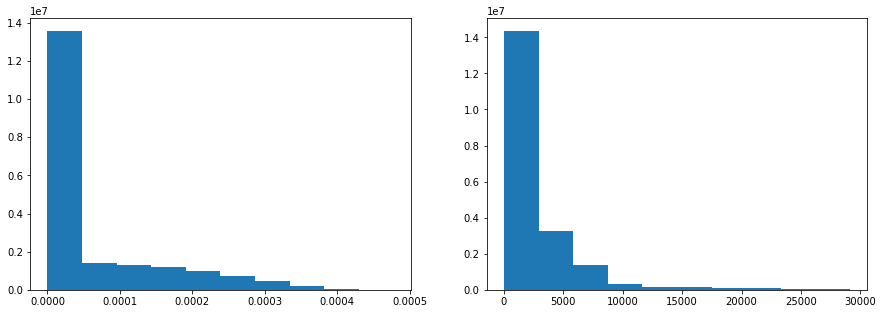

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].hist(d2d.arcsec)
axes[1].hist(d2d_v2.arcsec)